In [1]:
import pandas as pd

path = '/Users/kishanpatel/Desktop/VauntProject/'

df_jan = pd.read_csv(f'{path}VauntJan.csv')
df_feb = pd.read_csv(f'{path}VauntFeb.csv')
df_mar = pd.read_csv(f'{path}VauntMar.csv')
df_apr = pd.read_csv(f'{path}VauntApr.csv')
df_may = pd.read_csv(f'{path}VauntMay.csv')
df_jun = pd.read_csv(f'{path}VauntJun.csv')

df_all = pd.concat([df_jan, df_feb, df_mar, df_apr, df_may, df_jun], ignore_index=True)

df_all['purchase-date'] = pd.to_datetime(df_all['purchase-date'])

df_all = df_all.sort_values('purchase-date')

In [2]:
### DATA PREPROCESSING
columns_to_drop = [
    'amazon-order-id', 'merchant-order-id', 'last-updated-date', 'order-status', 
    'sales-channel', 'order-channel', 'url', 'sku', 'asin', 'item-status', 'currency',
    'item-tax', 'shipping-price', 'shipping-tax', 'gift-wrap-price', 'gift-wrap-tax',
    'item-promotion-discount', 'ship-promotion-discount', 'ship-city', 'ship-postal-code',
    'ship-country', 'promotion-ids', 'is-business-order', 'purchase-order-number',
    'price-designation', 'signature-confirmation-recommended'
]

df = df_all.drop(columns=columns_to_drop)

# Show remaining columns
remaining_columns = df.columns.tolist()
print(remaining_columns)

['purchase-date', 'fulfillment-channel', 'ship-service-level', 'product-name', 'quantity', 'item-price', 'ship-state']


In [3]:
df.describe(include='all', datetime_is_numeric=True)

,purchase-date,fulfillment-channel,ship-service-level,product-name,quantity,item-price,ship-state
count,4779,4779,4779,4779,4779.000000,4396.000000,4757
unique,NaN,2,5,71,NaN,NaN,186
top,NaN,Amazon,Standard,CeraVe Acne Foaming Cream Cleanser | Acne Trea...,NaN,NaN,CA
freq,NaN,2666,2627,639,NaN,NaN,495
mean,2023-04-11 16:31:59.150240768+00:00,NaN,NaN,NaN,1.067378,44.744452,NaN
min,2023-01-01 08:05:26+00:00,NaN,NaN,NaN,0.000000,0.000000,NaN
25%,2023-01-30 23:11:00.500000+00:00,NaN,NaN,NaN,1.000000,24.200000,NaN
50%,2023-05-10 18:02:14+00:00,NaN,NaN,NaN,1.000000,38.000000,NaN
75%,2023-06-07 15:41:50.500000+00:00,NaN,NaN,NaN,1.000000,66.400000,NaN
max,2023-07-01 06:55:45+00:00,NaN,NaN,NaN,67.000000,399.990000,NaN


In [4]:
### DATA CLEANING

df = df.dropna(subset=['quantity', 'item-price'])
df = df[(df['quantity'] != 0) & (df['item-price'] != 0)]

In [5]:
# Taking care of unruly state data by ensuring all entries conform to two character abbrev standard
state_mapping = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

df['ship-state'].replace(state_mapping, inplace=True)
df['ship-state'] = df['ship-state'].str.lower()
state_mapping_lower = {k.lower(): v for k, v in state_mapping.items()}
df['ship-state'].replace(state_mapping_lower, inplace=True)
df['ship-state'] = df['ship-state'].str.upper()

In [6]:
print(df['ship-state'].unique())

['MI' 'UT' 'CO' 'OH' 'NY' 'PA' 'NC' 'TX' 'IL' 'AL' 'MD' 'WI' 'GA' 'VA'
 'RI' 'WA' 'NJ' 'MA' 'CA' 'SC' 'TN' 'FL' 'LA' 'AZ' 'ND' 'MO' 'NH' 'ID'
 'KY' 'IN' 'ME' 'IA' 'NE' 'OR' 'WV' 'MS' 'CT' 'AR' 'SD' nan 'MN' 'KS' 'NV'
 'PR' 'NM' 'MT' 'VT' 'HI' 'DE' 'OK' 'ANTIOQUIA' 'AK' 'ISRAEL' 'HONG KONG'
 'TAIWAN (R.O.C.)' 'NSW' 'AE' 'SHANHUA DIST' 'WY' 'DC' 'ONTARIO' 'ON'
 'METRO MANILA' 'ALBERTA' 'BRITISH COLUMBIA' 'GUANG DONG' 'TAIWAN' 'AP'
 'NEW TERRITORIES' 'NCR' 'N.C.']


In [7]:
# Convert everything to uppercase for uniformity
df['ship-state'] = df['ship-state'].str.upper()
df['ship-state'].replace(state_mapping, inplace=True)

# Let's call anything outside the US, "International" for now
df['ship-state'] = df['ship-state'].apply(lambda x: 'INTERNATIONAL' if x not in state_mapping.values() else x)

In [8]:
print(df['ship-state'].unique())

['MI' 'UT' 'CO' 'OH' 'NY' 'PA' 'NC' 'TX' 'IL' 'AL' 'MD' 'WI' 'GA' 'VA'
 'RI' 'WA' 'NJ' 'MA' 'CA' 'SC' 'TN' 'FL' 'LA' 'AZ' 'ND' 'MO' 'NH' 'ID'
 'KY' 'IN' 'ME' 'IA' 'NE' 'OR' 'WV' 'MS' 'CT' 'AR' 'SD' 'INTERNATIONAL'
 'MN' 'KS' 'NV' 'NM' 'MT' 'VT' 'HI' 'DE' 'OK' 'AK' 'WY']


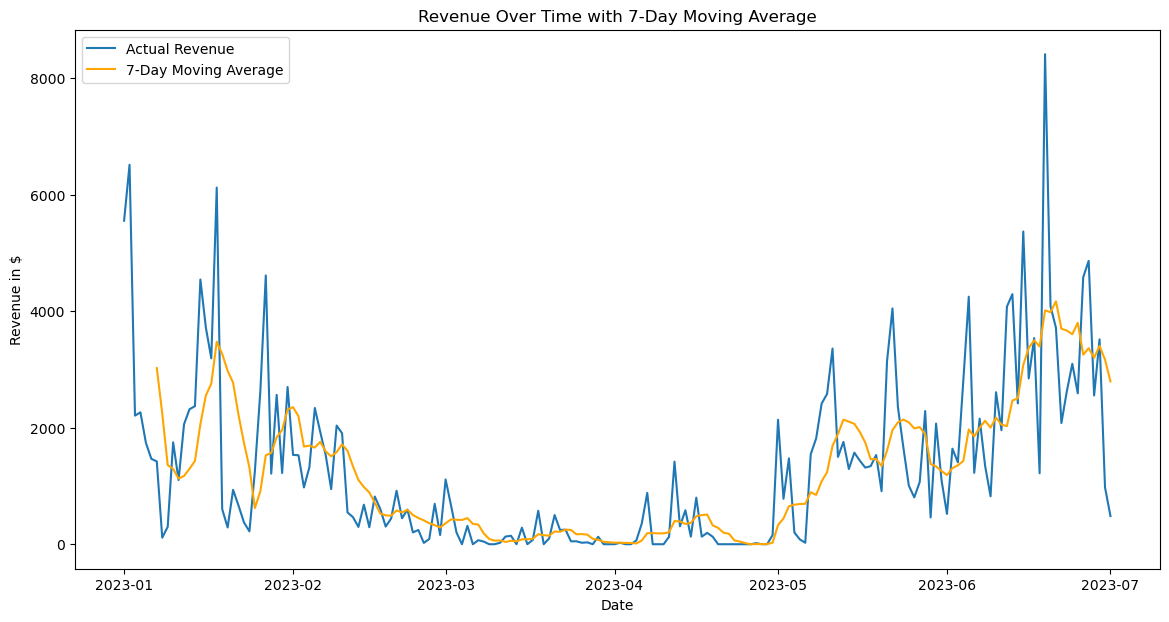

In [9]:
import matplotlib.pyplot as plt

### LET'S MAKE SOME GRAPHS!!

df_all['purchase-date'] = pd.to_datetime(df_all['purchase-date'])
df.set_index('purchase-date', inplace=True)

# Calculate daily revenue
df_daily_revenue = df.resample('D').apply(lambda x: (x['item-price'] * x['quantity']).sum())


rolling_mean = df_daily_revenue.rolling(window=7).mean()

# Plotting Line Graph with Moving Average
plt.figure(figsize=(14, 7))
plt.plot(df_daily_revenue.index, df_daily_revenue.values, label='Actual Revenue')
plt.plot(rolling_mean.index, rolling_mean.values, label='7-Day Moving Average', color='orange')
plt.xlabel('Date')
plt.ylabel('Revenue in $')
plt.title('Revenue Over Time with 7-Day Moving Average')
plt.legend()
plt.show()

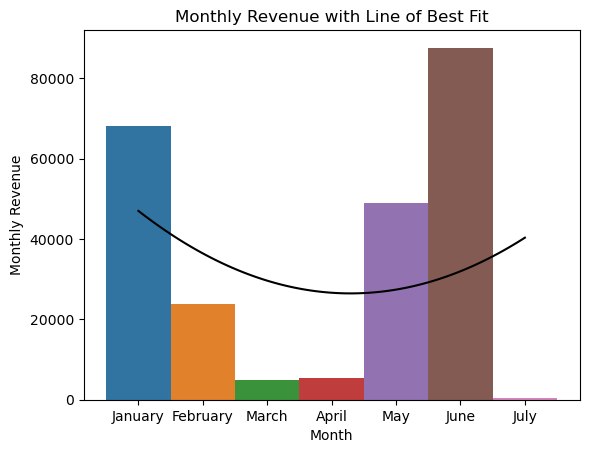

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate monthly revenue
df_monthly_revenue = df.resample('M').apply(lambda x: (x['item-price'] * x['quantity']).sum())

# Let's create a bar plot with exponential line of best fit
sns.barplot(x=df_monthly_revenue.index.month, y=df_monthly_revenue.values, errorbar=None, width=1)

x = df_monthly_revenue.index.month
y = df_monthly_revenue.values
z = np.polyfit(x, y, 2)
p = np.poly1d(z)

xp = np.linspace(min(x), max(x), 100)
x_shifted = xp - 1  # Adjusted to shift the line left
plt.plot(x_shifted, p(xp), '-', color='black') 

plt.xlabel("Month")
plt.ylabel("Monthly Revenue")
plt.title("Monthly Revenue with Line of Best Fit")
plt.xticks(ticks=range(len(df_monthly_revenue.index.month)), labels=df_monthly_revenue.index.month_name())
plt.ylim(bottom=0)
plt.show()

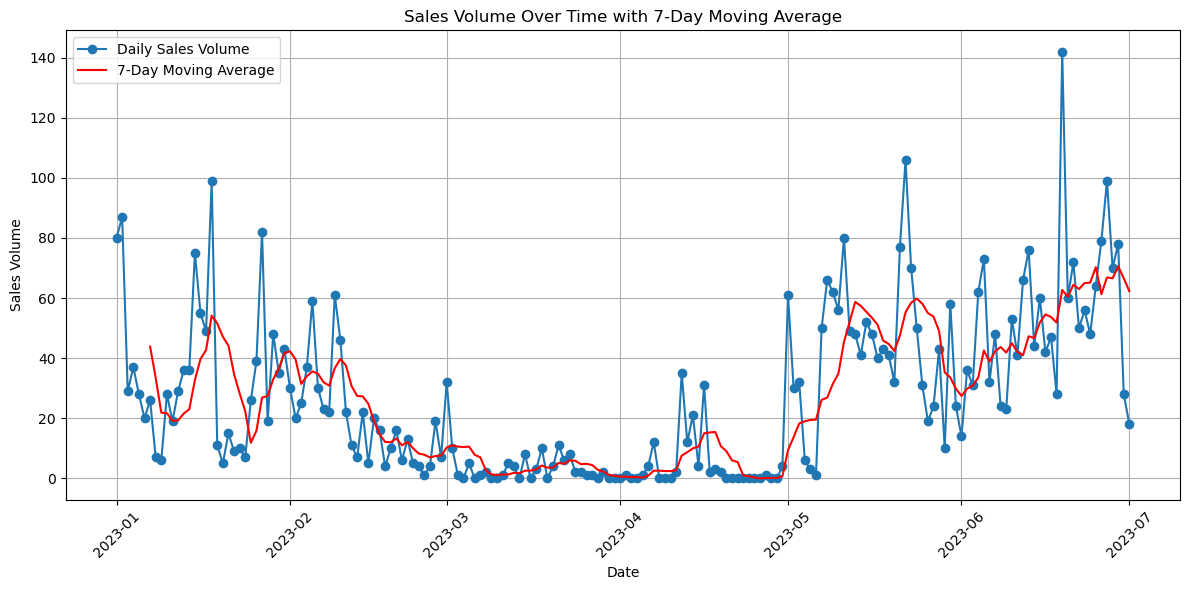

In [11]:
# Calculate daily sales volume
df_daily_sales_volume = df.resample('D')['quantity'].sum()

# Calculate 7-day moving average
rolling_average = df_daily_sales_volume.rolling(window=7).mean()

# Let's do another line chart for daily sales volume

plt.figure(figsize=(12, 6))
plt.plot(df_daily_sales_volume.index, df_daily_sales_volume.values, marker='o', label='Daily Sales Volume')
plt.plot(rolling_average.index, rolling_average.values, color='red', label='7-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.title('Sales Volume Over Time with 7-Day Moving Average')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()

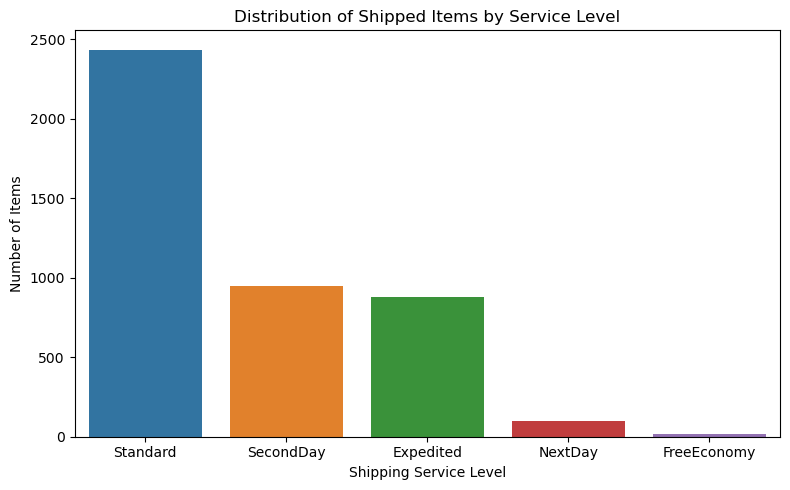

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Let's take a quick look at how the types of shipping services were distributed for my products

shipping_counts = df['ship-service-level'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=shipping_counts.index, y=shipping_counts.values)
plt.xlabel('Shipping Service Level')
plt.ylabel('Number of Items')
plt.title('Distribution of Shipped Items by Service Level')
plt.tight_layout()

plt.show()

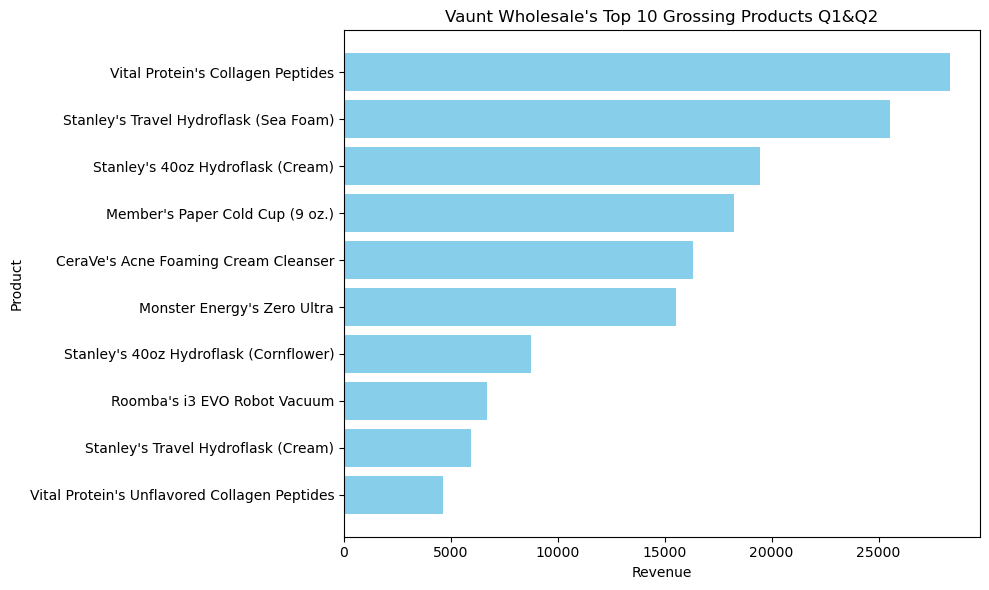

In [13]:
import matplotlib.pyplot as plt

df_product_revenue = df.groupby('product-name')['item-price'].sum()

df_popular_products_revenue = df_product_revenue.sort_values(ascending=False)

# Let's create a dictionary to map the lengthy product names to shorter ones
name_mapping = {
    "Vital Proteins Natural Whole Nutrition Collagen Peptides - Pasture Raised, Grass Fed, Paleo Friendly, Gluten Free, Single Ingredient - 24 Ounce": "Vital Protein's Collagen Peptides",
    "Stanley Adventure Quencher Travel Tumbler 40oz Sea Foam": "Stanley's Travel Hydroflask (Sea Foam)",
    "Stanley Quencher H2.0 FlowState Tumbler 40oz (Cream)": "Stanley's 40oz Hydroflask (Cream)",
    "Member's Mark Paper Cold Cup, 9 oz. (360 ct.)": "Member's Paper Cold Cup (9 oz.)",
    "CeraVe Acne Foaming Cream Cleanser | Acne Treatment Face Wash with 4% Benzoyl Peroxide, Hyaluronic Acid, and Niacinamide | Cream to Foam Formula | Fragrance Free & Non Comedogenic | 5 Oz": "CeraVe's Acne Foaming Cream Cleanser",
    "Monster Energy Zero Ultra, Sugar Free Energy Drink, 16 Fl Oz (Pack of 24)": "Monster Energy's Zero Ultra",
    "Stanley Adventure Quencher Travel Tumbler 40oz Cornflower": "Stanley's 40oz Hydroflask (Cornflower)",
    "iRobot Roomba i3 EVO (3150) Wi-Fi Connected Robot Vacuum - Now Clean by Room with Smart Mapping Works with Alexa Ideal for Pet Hair Carpets & Hard Flo": "Roomba's i3 EVO Robot Vacuum",
    "Stanley Adventure Quencher Travel Tumbler 40 oz Pack of 1 Cream Color": "Stanley's Travel Hydroflask (Cream)",
    "Vital Proteins, Unflavored Collagen Peptides, 20 Ounce": "Vital Protein's Unflavored Collagen Peptides",
}

df_popular_products_revenue_short_names = df_popular_products_revenue.rename(index=name_mapping)

# Plotting as a barchart
plt.figure(figsize=(10, 6))
plt.barh(df_popular_products_revenue_short_names.index[:10], df_popular_products_revenue_short_names.values[:10], color='skyblue')
plt.xlabel('Revenue')
plt.ylabel('Product')
plt.title("Vaunt Wholesale's Top 10 Grossing Products Q1&Q2")
plt.gca().invert_yaxis() 
plt.tight_layout()

plt.show()


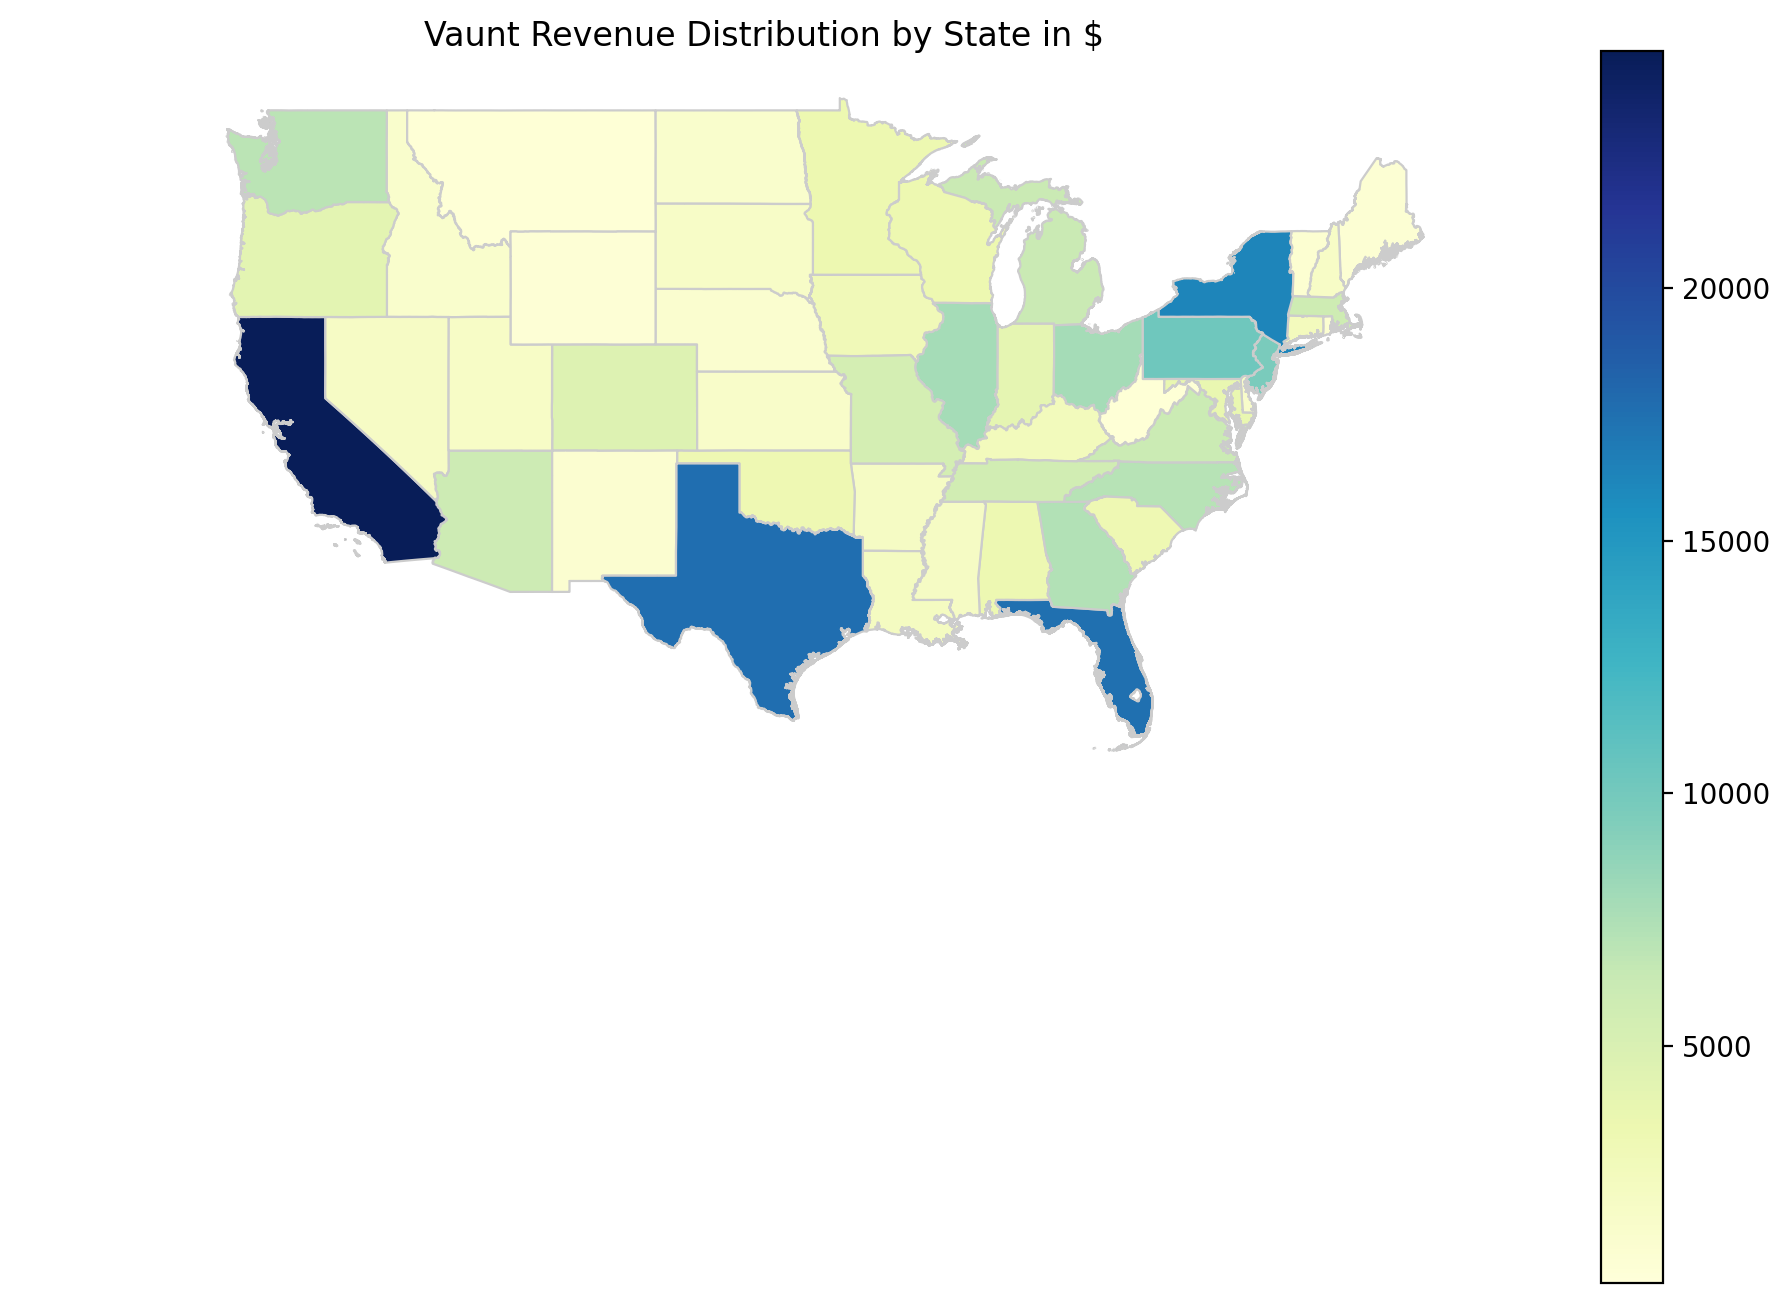

In [112]:
import geopandas as gpd
import matplotlib.pyplot as plt

### Let's make a cloropleth map to see where my customers are located

us_states = gpd.read_file('/Users/kishanpatel/Desktop/VauntProject/s_08mr23/s_08mr23.shp')
us_states = us_states.to_crs(epsg=3395)

df['revenue'] = df['quantity'] * df['item-price']

merged_data = us_states.merge(df.groupby('ship-state')['revenue'].sum().reset_index(), left_on='STATE', right_on='ship-state')

fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_data.plot(column='revenue', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

ax.set_xlim([-15000000, -7000000]) # Had to mess with these values until the image rendered properly
ax.set_ylim([0, 6500000])
ax.set_aspect('equal')
ax.set_title('Vaunt Revenue Distribution by State in $')
ax.set_axis_off()
plt.show()